In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
print("Pandas version used: " + pd.__version__)
print("Seaborn version used: " + sns.__version__)
print("Matplotlib version used: " + plt.matplotlib.__version__)

Pandas version used: 1.0.5
Seaborn version used: 0.10.1
Matplotlib version used: 3.2.2


In [2]:
# Read the dataset into a pandas dataframe:
stu_perf_df = pd.read_csv('../Datasets/stu_perf_raw.csv')

In [3]:
# Look at the first few rows of the dataset:
stu_perf_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,some high school,standard,none,71,59,54
1,female,group B,some high school,free/reduced,none,40,51,49
2,male,group B,associate's degree,standard,none,87,73,75
3,male,group C,some high school,standard,none,69,53,55
4,female,group C,high school,standard,none,74,79,72


In [4]:
# Look at some information about the dataset, how many rows, and what data types:
stu_perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       10000 non-null  object
 1   race/ethnicity               10000 non-null  object
 2   parental level of education  10000 non-null  object
 3   lunch                        10000 non-null  object
 4   test preparation course      10000 non-null  object
 5   math score                   10000 non-null  int64 
 6   reading score                10000 non-null  int64 
 7   writing score                10000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


<h3>The dataset has 10,000 rows with 8 columns

In [5]:
# Check to see if there are any null values:
stu_perf_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Make sure we have expected values for the feature columns and that there's nothing out of the ordinary:
# For each column, print out the column header and all of the distinct values within it:
for col in stu_perf_df.columns:
    print("\n" + str(col) + ":\n" + str(stu_perf_df[col].unique()))


gender:
['male' 'female']

race/ethnicity:
['group B' 'group C' 'group D' 'group E' 'group A']

parental level of education:
['some high school' "associate's degree" 'high school' "master's degree"
 'some college' "bachelor's degree"]

lunch:
['standard' 'free/reduced']

test preparation course:
['none' 'completed']

math score:
[ 71  40  87  69  74  95  94  63  89  82  84  59  83 100  54  62  67  70
  85  76  56  73  66  72  61  55  64  81  60  90  77  52  68  88  36  65
  57  79  49  50  53  51  46  91  80  39  78  45  34  42  47  99  75  43
  33  35  14  92  96  93  86  58  41  48  23  38  44  97  30  32  29  31
  28  98  22  37  27  20  21  16  19  24  18  15   5  26  12  25   7]

reading score:
[ 59  51  73  53  79  80  91  84  87  82  92  54  76  69  58  52  96  75
  81  86  72  65  62  67  71  56  63  97  83  77  74  90  93  36  85  60
  70  50  88  94  68  55  61  47  42 100  78  99  89  45  66  64  48  57
  46  95  44  13  98  49  34  39  41  37  43  38  40  27  25  31  32  3

<h3>Thankfully there are no null values and all of the inputs match the expectations of their respective columns. Now to give the columns better names and then work on visualizing some of the data in its raw form before performing one-hot encoding for the categorical features:

<h3>The index has no name and some of the column names are too long or include spaces which will make things difficult. These will need to be renamed along with several other changes:

In [7]:
# Let's give the index a name ('stu_id') and then shorten some of the column names and add
# underscores to the ones that need them:
stu_perf_df.index.name = 'stu_id'
stu_perf_df.rename(columns={'gender':'sex',
                            'race/ethnicity':'ethnicity',
                            'parental level of education':'parent_ed',
                            'test preparation course':'test_prep',
                            'math score':'math_score',
                            'reading score':'reading_score',
                            'writing score':'writing_score'}, inplace=True)

<h3>I also want to create an average_score column that will serve as the main target variable. We can then look to see if individual subject scores are better predicted by these features later:

In [8]:
# Add the math, reading, and writing scores together and then divide them by 3 to get an average total score:
stu_perf_df['avg_score'] = ((stu_perf_df['math_score'] + stu_perf_df['reading_score'] + stu_perf_df['writing_score'])/3)

# Round the Avg. Score to just 2 decimal places. Assuming precision beyond 2 digits is not useful and rather just confusing:
stu_perf_df.avg_score = stu_perf_df.avg_score.round(2)

In [9]:
# Let's make sure the avg_score column turned out properly:
stu_perf_df.head()

,sex,ethnicity,parent_ed,lunch,test_prep,math_score,reading_score,writing_score,avg_score
stu_id,,,,,,,,,
0,male,group B,some high school,standard,none,71,59,54,61.33
1,female,group B,some high school,free/reduced,none,40,51,49,46.67
2,male,group B,associate's degree,standard,none,87,73,75,78.33
3,male,group C,some high school,standard,none,69,53,55,59.00
4,female,group C,high school,standard,none,74,79,72,75.00


<h3>The columns are in much better shape, so now to begin visualizing some of the raw data:

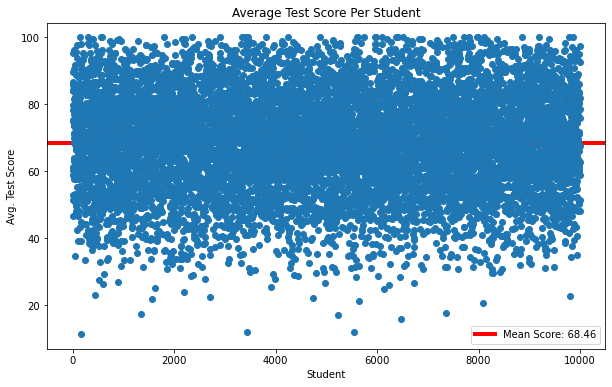

In [10]:
# Let's begin with a scatterplot of the average test score and a line showing the mean:
fig = plt.subplots(figsize=(10,6))
x = stu_perf_df.index
y = stu_perf_df['avg_score']
plt.title('Average Test Score Per Student')
# Draw a line at the mean of the avg_score
plt.axhline(y=y.mean(), c='r', lw=4, label='Mean Score: ' + str(round(y.mean(), 2)))
plt.legend()
plt.xlabel('Student')
plt.ylabel('Avg. Test Score')
plt.plot(x, y, 'o')

<h3>The mean of the average test scores is 68.46. At least most of the students seem to have passed. Now for each individual subject:

Text(0.5, 1.0, 'Writing Scores for All Students')

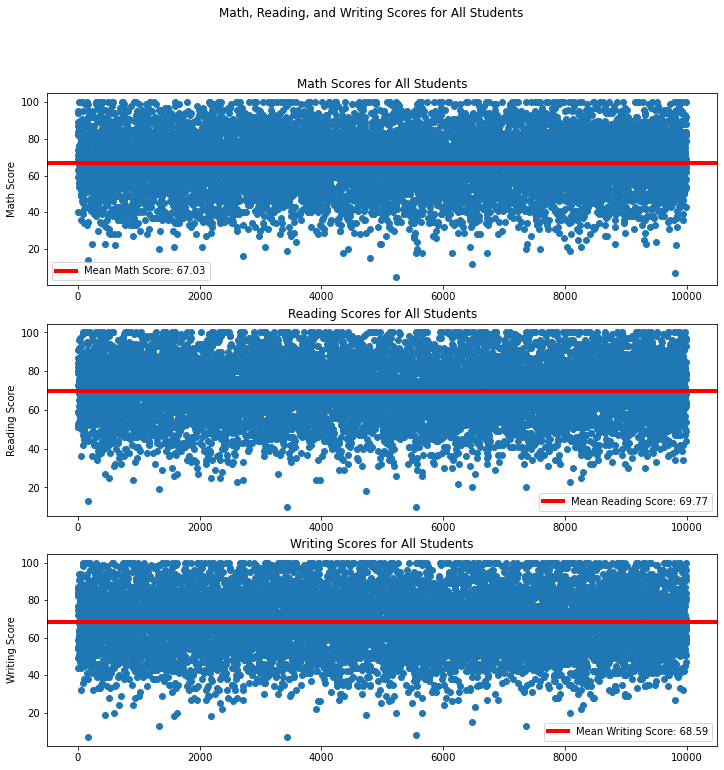

In [11]:
# Build a figure that shows all 3 scores (Math, Reading, and Writing) together along with their respective means:

# Create the variables to represent the 'y' axis of each respective graph:
m = stu_perf_df['math_score']
r = stu_perf_df['reading_score']
w = stu_perf_df['writing_score']

# Generate the subplots and figure aspects:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
fig.suptitle('Math, Reading, and Writing Scores for All Students')
ax1.plot(x, m, 'o')
ax1.axhline(y=m.mean(), c='r', lw=4, label='Mean Math Score: ' + str(round(m.mean(), 2)))
ax1.legend()
ax1.set_ylabel('Math Score')
ax1.set_title('Math Scores for All Students')
ax2.plot(x, r, 'o')
ax2.axhline(y=r.mean(), c='r', lw=4, label='Mean Reading Score: ' + str(round(r.mean(), 2)))
ax2.legend()
ax2.set_ylabel('Reading Score')
ax2.set_title('Reading Scores for All Students')
ax3.plot(x, w, 'o')
ax3.axhline(y=w.mean(), c='r', lw=4, label='Mean Writing Score: ' + str(round(w.mean(), 2)))
ax3.legend()
ax3.set_ylabel('Writing Score')
ax3.set_title('Writing Scores for All Students')

<h3>The mean score for the Math test was the lowest (67.03) while the mean score for the Reading test was highest (69.77). The mean for the writing test was 68.59. Now to look at what factors seem to contribute to higher or lower test scores:

<h3>Each of the features need to be explored thoroughly, as intuitively any of them could have an impact on the test scores, even if not directly. For example, the ethnicity and lunch features might indicate a socioeconomic impact on test scores.

<h3>I also want to see if the population is evenly split between sex and if any of the particular ethnic groups are under or over represented:

In [12]:
# Print the value counts for the first 4 columns (everything except the scores) in the dataframe:
for col in stu_perf_df.columns[0:4]:
    print("\n" + str(col) + ":\n" + str(stu_perf_df[col].value_counts()))


sex:
male      5031
female    4969
Name: sex, dtype: int64

ethnicity:
group C    3193
group D    2599
group B    2064
group E    1381
group A     763
Name: ethnicity, dtype: int64

parent_ed:
some college          2297
associate's degree    1987
high school           1987
some high school      1863
bachelor's degree     1230
master's degree        636
Name: parent_ed, dtype: int64

lunch:
standard        6577
free/reduced    3423
Name: lunch, dtype: int64


<h3>We have an even split between the sexes but in ethnic groups Group C appears to be the majority while Group A is the minority. The parent education is pretty even until the lower amounts of bachelor's and master's degrees, which is to be expected. Finally, most students get the standard lunch while about 34% have a free or reduced lunch. Overall I don't think there are going to be any major issues with this spread.

<h3>For visualizations, let's start with the various ethnic groups and sex:

Text(0.5, 1.0, 'Average Total Test Score vs. Ethnicity and Sex')

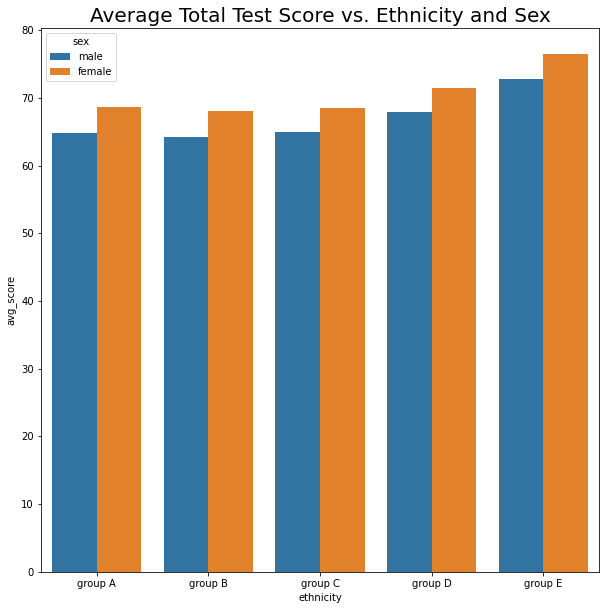

In [13]:
fig = plt.subplots(figsize=(10,10))
# Create barplot of ethnicity vs. avg_score split between sexes:
sns.barplot(x ='ethnicity',
            y ='avg_score',
            data = stu_perf_df,
            order = ['group A', 'group B', 'group C', 'group D', 'group E'],
            hue='sex',
            ci=None)
plt.title("Average Total Test Score vs. Ethnicity and Sex", fontdict={'fontsize':20})

<h3>The average score of ethnic groups D and E seem to be slightly higher than the average scores of the other groups. This could indicate some kind of underlying socioeconomic impact or could just be random noise. It also seems that female students perform better on the tests than male students. 

Text(0.5, 1.0, 'Average Total Score vs. Lunch Status')

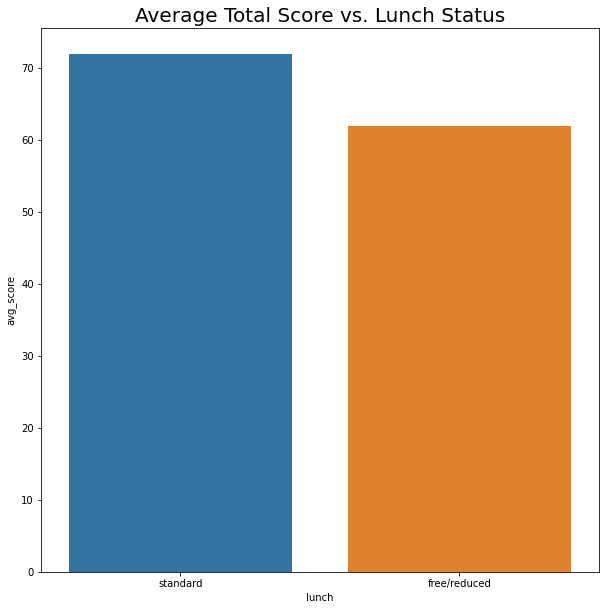

In [14]:
fig = plt.subplots(figsize=(10,10))
# Create barplot of ethnicity vs. avg_score split between standard or free/reduced lunch:
sns.barplot(x ='lunch',
            y ='avg_score',
            data = stu_perf_df,
            ci=None)
plt.title("Average Total Score vs. Lunch Status", fontdict={'fontsize':20})

<h3>There is a significant difference in average test scores between the students who have standard lunches and those who have free/reduced lunches. This could hint at an underlying socioeconomic impact on test performance. It would be interesting to see how this correlates with parental education.

Text(0.5, 1.0, 'Average Total Score vs. Parental Education')

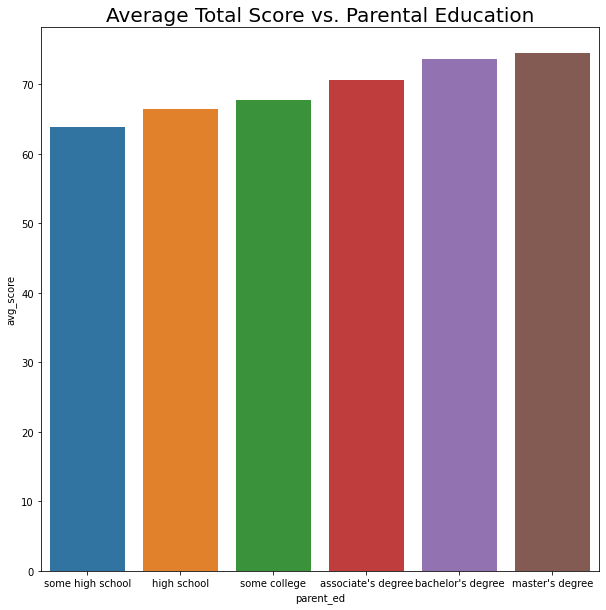

In [15]:

fig = plt.subplots(figsize=(10,10))
sns.barplot(x='parent_ed',
            y='avg_score',
            order=['some high school',
                   'high school',
                   'some college',
                   'associate\'s degree',
                   'bachelor\'s degree',
                   'master\'s degree'],
            data=stu_perf_df,
            ci=None)
plt.title("Average Total Score vs. Parental Education", fontdict={'fontsize':20})

<h3>Not surprisingly, the students tend to perform better on the tests if their parents are more educated.

Text(0.5, 1.0, 'Average Total Score vs. Parental Education and Lunch Status')

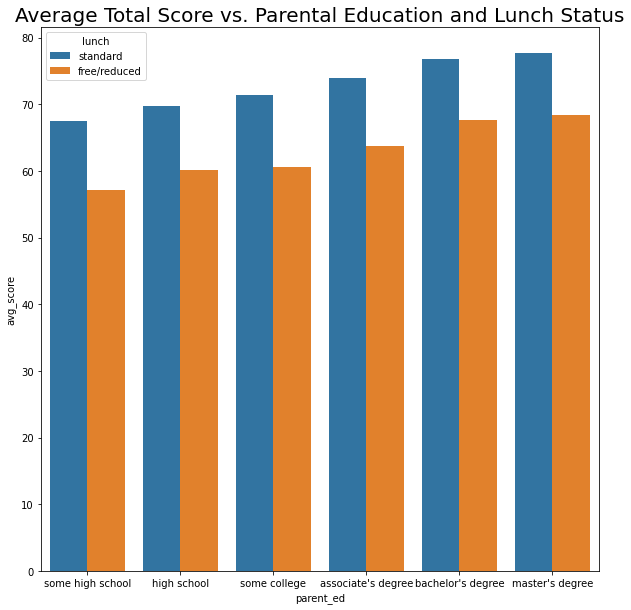

In [16]:
fig = plt.subplots(figsize=(10,10))
sns.barplot(x='parent_ed',
            y='avg_score',
            order=['some high school',
                   'high school',
                   'some college',
                   'associate\'s degree',
                   'bachelor\'s degree',
                   'master\'s degree'],
            data=stu_perf_df,
            hue='lunch',
            ci=None)
plt.title("Average Total Score vs. Parental Education and Lunch Status", fontdict={'fontsize':20})

<h3>It's clear that the best performing students are those who have the standard lunch and who have more educated parents.

Text(0.5, 1.0, 'Average Total Score vs. Parental Education and Test Prep Status')

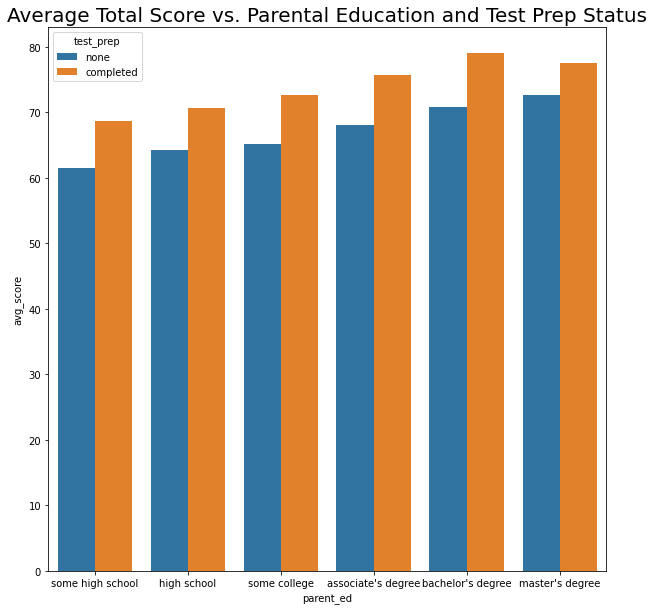

In [17]:
fig = plt.subplots(figsize=(10,10))
sns.barplot(x='parent_ed',
            y='avg_score',
            order=['some high school',
                   'high school',
                   'some college',
                   'associate\'s degree',
                   'bachelor\'s degree',
                   'master\'s degree'],
            data=stu_perf_df,
            hue='test_prep',
            ci=None)
plt.title("Average Total Score vs. Parental Education and Test Prep Status", fontdict={'fontsize':20})

<h3>Completing the test preparation also makes a huge difference in test scores.

<h3>With the initial analysis complete, the dataframe can be adjusted to make it better for our model:

In [18]:
# Take a look at what other transformations we can make to better use the columns as features:
stu_perf_df.head()

,sex,ethnicity,parent_ed,lunch,test_prep,math_score,reading_score,writing_score,avg_score
stu_id,,,,,,,,,
0,male,group B,some high school,standard,none,71,59,54,61.33
1,female,group B,some high school,free/reduced,none,40,51,49,46.67
2,male,group B,associate's degree,standard,none,87,73,75,78.33
3,male,group C,some high school,standard,none,69,53,55,59.00
4,female,group C,high school,standard,none,74,79,72,75.00


<h3>All of these columns except the test scores, of course, should be turned into dummy variables in order to make them machine readable:

In [19]:
# Generate dummy columns for one-hot encoding for sex, ethnicity, parent_ed, lunch, and test_prep:
stu_perf_df_cln = pd.get_dummies(stu_perf_df, columns=['sex', 'ethnicity', 'parent_ed', 'lunch', 'test_prep'])
stu_perf_df_cln.head()

,math_score,reading_score,writing_score,avg_score,sex_female,sex_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,...,parent_ed_associate's degree,parent_ed_bachelor's degree,parent_ed_high school,parent_ed_master's degree,parent_ed_some college,parent_ed_some high school,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
stu_id,,,,,,,,,,,,,,,,,,,,,
0,71,59,54,61.33,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,40,51,49,46.67,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
2,87,73,75,78.33,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
3,69,53,55,59.00,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
4,74,79,72,75.00,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1


In [20]:
# Now we can drop several of the extra columns that are unnecessary:
stu_perf_df_cln.drop(axis=1, columns=['sex_male', 'ethnicity_group E', 'parent_ed_some high school',
                          'lunch_free/reduced', 'test_prep_none'], inplace=True)

In [21]:
# Take a look at the remaining columns to get an idea of how we can improve their names, etc:
stu_perf_df_cln.columns

Index(['math_score', 'reading_score', 'writing_score', 'avg_score',
       'sex_female', 'ethnicity_group A', 'ethnicity_group B',
       'ethnicity_group C', 'ethnicity_group D',
       'parent_ed_associate's degree', 'parent_ed_bachelor's degree',
       'parent_ed_high school', 'parent_ed_master's degree',
       'parent_ed_some college', 'lunch_standard', 'test_prep_completed'],
      dtype='object')

In [22]:
# Shorten virtually all of the column names to be easier to read:
stu_perf_df_cln.rename(columns={'sex_female':'female',
                                'ethnicity_group A':'eth_A',
                                'ethnicity_group B':'eth_B',
                                'ethnicity_group C':'eth_C',
                                'ethnicity_group D':'eth_D',
                                'parent_ed_associate\'s degree':'p_ed_assc',
                                'parent_ed_bachelor\'s degree':'p_ed_bach',
                                'parent_ed_master\'s degree':'p_ed_mast',
                                'parent_ed_some college':'p_ed_som_col',
                                'parent_ed_high school':'p_ed_hs',
                                'lunch_standard':'std_lunch',
                                'test_prep_completed':'test_prep'}, inplace=True)

<h3>The features are a lot more managable now and will be legible to the ML models.

In [23]:
list(stu_perf_df_cln.columns)

['math_score',
 'reading_score',
 'writing_score',
 'avg_score',
 'female',
 'eth_A',
 'eth_B',
 'eth_C',
 'eth_D',
 'p_ed_assc',
 'p_ed_bach',
 'p_ed_hs',
 'p_ed_mast',
 'p_ed_som_col',
 'std_lunch',
 'test_prep']

In [24]:
# Reorder the columns to be a little cleaner. Put p_ed in order of increasing education and move scores to right side of DF:
stu_perf_df_cln = stu_perf_df_cln[[
                                    'female',
                                    'eth_A',
                                    'eth_B',
                                    'eth_C',
                                    'eth_D',
                                    'p_ed_hs',
                                    'p_ed_som_col',
                                    'p_ed_assc',
                                    'p_ed_bach',
                                    'p_ed_mast',
                                    'std_lunch',
                                    'test_prep',
                                    'math_score',
                                    'reading_score',
                                    'writing_score','avg_score']]

In [25]:
# Make sure our final, cleaned up dataset looks good:
stu_perf_df_cln.head(10)

,female,eth_A,eth_B,eth_C,eth_D,p_ed_hs,p_ed_som_col,p_ed_assc,p_ed_bach,p_ed_mast,std_lunch,test_prep,math_score,reading_score,writing_score,avg_score
stu_id,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,1,0,71,59,54,61.33
1,1,0,1,0,0,0,0,0,0,0,0,0,40,51,49,46.67
2,0,0,1,0,0,0,0,1,0,0,1,0,87,73,75,78.33
3,0,0,0,1,0,0,0,0,0,0,1,0,69,53,55,59.00
4,1,0,0,1,0,1,0,0,0,0,1,0,74,79,72,75.00
5,0,0,0,0,1,0,0,0,0,1,1,0,95,80,82,85.67
6,0,0,0,0,1,0,0,1,0,0,1,1,94,91,84,89.67
7,0,0,1,0,0,0,1,0,0,0,1,0,63,59,59,60.33
8,0,0,0,0,0,0,0,0,1,0,1,1,89,84,87,86.67


In [26]:
# Save the cleaned up, one-hot encoded dataframe into csv:
stu_perf_df_cln.to_csv('../Datasets/stu_perf_clean.csv')

<h3>Now to create a one-hot encoded version of the test dataset:

In [27]:
# Read in the test data as a dataframe:
test_data_df = pd.read_csv('../Datasets/test_data_raw.csv')

In [28]:
# Quickly apply all the same transformations that the training dataset went through for the test dataset
# And save it in the same Datasets folder:
test_data_df.index.name = 'stu_id'

test_data_df.rename(columns={'gender':'sex',
                            'race/ethnicity':'ethnicity',
                            'parental level of education':'parent_ed',
                            'test preparation course':'test_prep',
                            'math score':'math_score',
                            'reading score':'reading_score',
                            'writing score':'writing_score'}, inplace=True)

test_data_df['avg_score'] = ((test_data_df['math_score'] + test_data_df['reading_score'] + test_data_df['writing_score'])/3)

test_data_df.avg_score = test_data_df.avg_score.round(2)

test_data_df_cln = pd.get_dummies(test_data_df, columns=['sex', 'ethnicity', 'parent_ed', 'lunch', 'test_prep'])

test_data_df_cln.drop(axis=1, columns=['sex_male', 'ethnicity_group E', 'parent_ed_some high school','lunch_free/reduced', 'test_prep_none'], inplace=True)

test_data_df_cln.rename(columns={'sex_female':'female',
                                'ethnicity_group A':'eth_A',
                                'ethnicity_group B':'eth_B',
                                'ethnicity_group C':'eth_C',
                                'ethnicity_group D':'eth_D',
                                'parent_ed_associate\'s degree':'p_ed_assc',
                                'parent_ed_bachelor\'s degree':'p_ed_bach',
                                'parent_ed_master\'s degree':'p_ed_mast',
                                'parent_ed_some college':'p_ed_som_col',
                                'parent_ed_high school':'p_ed_hs',
                                'lunch_standard':'std_lunch',
                                'test_prep_completed':'test_prep'}, inplace=True)

test_data_df_cln = test_data_df_cln[[
                                    'female',
                                    'eth_A',
                                    'eth_B',
                                    'eth_C',
                                    'eth_D',
                                    'p_ed_hs',
                                    'p_ed_som_col',
                                    'p_ed_assc',
                                    'p_ed_bach',
                                    'p_ed_mast',
                                    'std_lunch',
                                    'test_prep',
                                    'math_score',
                                    'reading_score',
                                    'writing_score','avg_score']]

test_data_df_cln.to_csv('../Datasets/test_data_clean.csv')

<h3>Now we have the clean and properly encoded training and test datasets that are needed for the model.